In [127]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the MP3 audio file
mp3_file = "blues.00000.wav"
y, sr = librosa.load(mp3_file)


y = y[:10000]
# Display basic information about the audio
print(f"Duration: {librosa.get_duration(y=y, sr=sr):.2f} seconds")
print(f"Number of samples: {len(y)}")
print(f"Sampling rate: {sr} Hz")


Duration: 0.45 seconds
Number of samples: 10000
Sampling rate: 22050 Hz


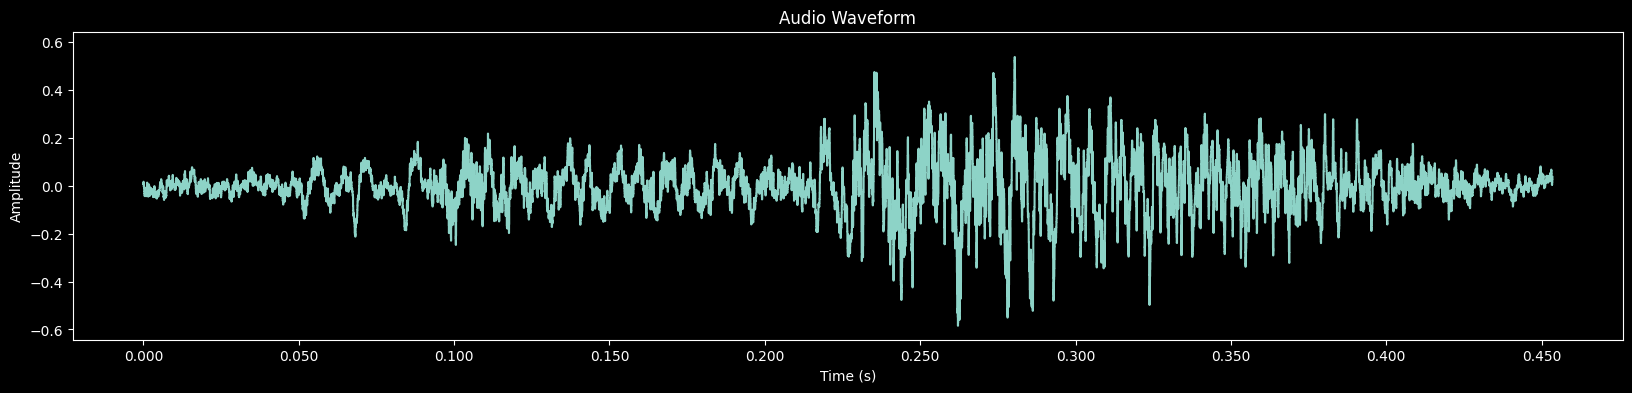

In [128]:
# Plot the waveform
plt.figure(figsize=(20, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


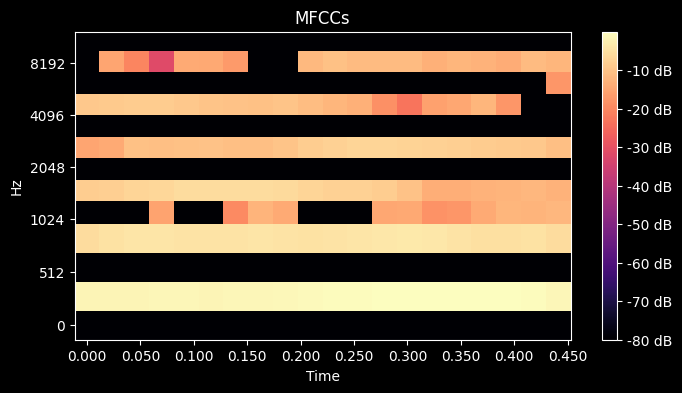

In [129]:
# Calculate the Mel-frequency cepstral coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Display the MFCCs
plt.figure(figsize=(8, 4))
librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.show()

In [130]:
signal_mean = np.mean(y)
signal_std = np.std(y)
signal_max = np.max(y)
signal_min = np.min(y)

print(f"Mean: {signal_mean:.5f}")
print(f"Standard deviation: {signal_std:.2f}")
print(f"Max: {signal_max:.2f}")
print(f"Min: {signal_min:.2f}")


Mean: 0.00037
Standard deviation: 0.11
Max: 0.54
Min: -0.58


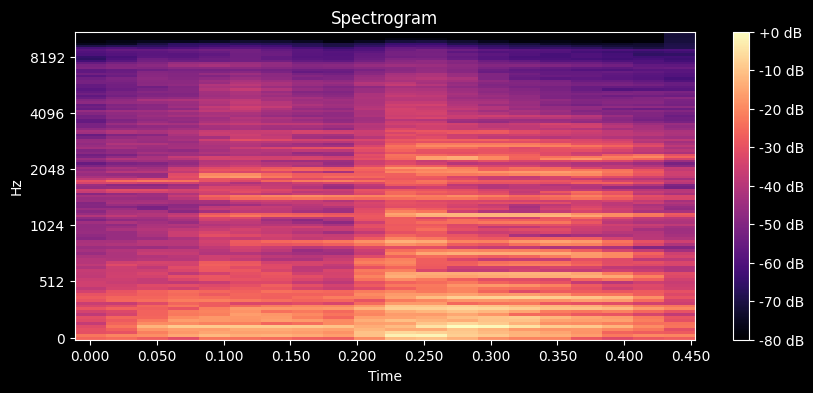

In [131]:
# Calculate the spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert the power spectrogram to dB scale
db_S = librosa.power_to_db(S, ref=np.max)

# Display the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(db_S, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

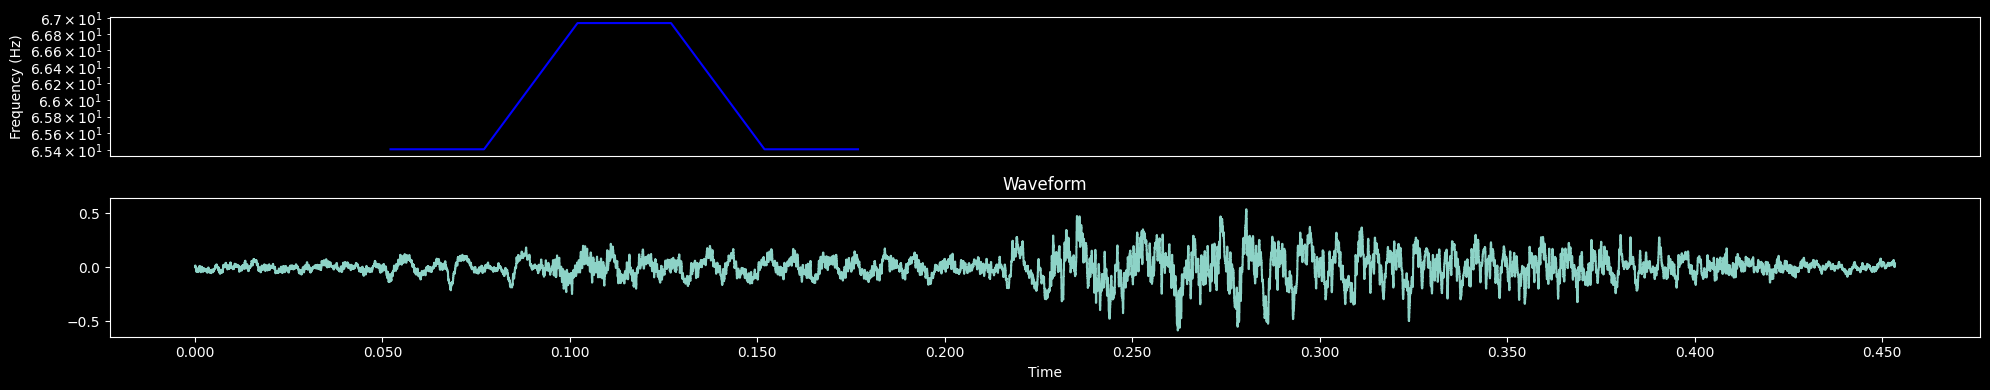

In [132]:
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Plot the F0 (pitch) contour
plt.figure(figsize=(20, 4))
plt.subplot(2, 1, 1)
plt.semilogy(f0, label='F0 (fundamental frequency)', color='b')
plt.ylabel('Frequency (Hz)')
plt.xticks([])
plt.xlim([0, len(f0)])

# Plot the waveform
plt.subplot(2, 1, 2)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')

plt.tight_layout()
plt.show()

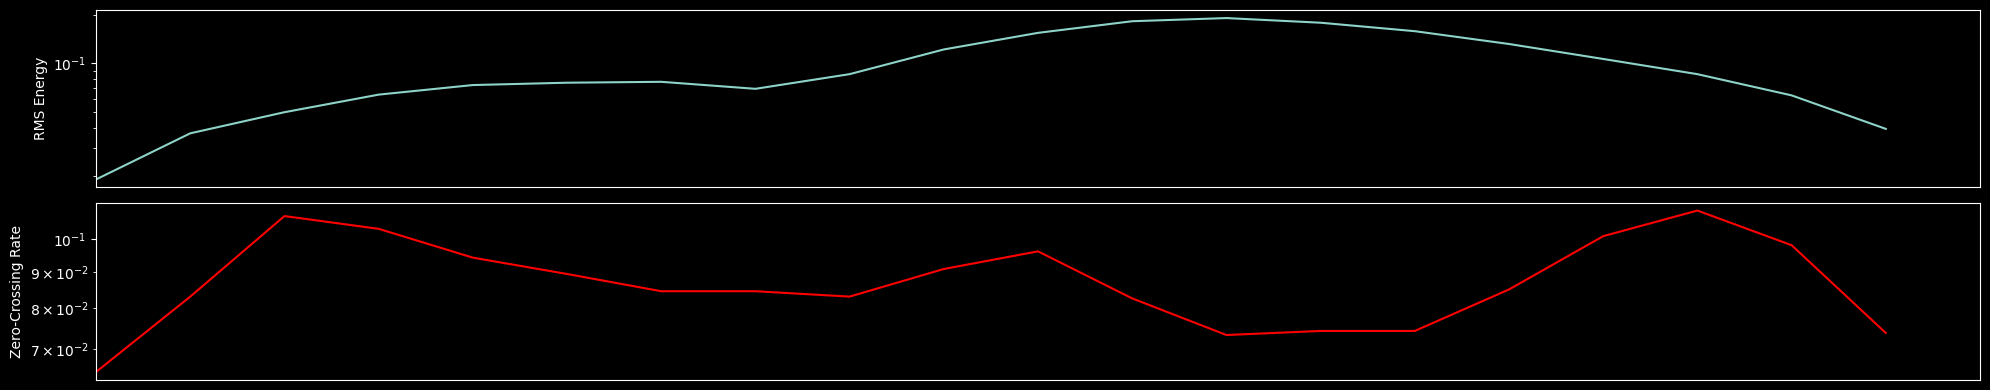

In [133]:
rms = librosa.feature.rms(y=y)

# Calculate the zero-crossing rate
zcr = librosa.feature.zero_crossing_rate(y=y)

# Plot the RMS energy and zero-crossing rate
plt.figure(figsize=(20, 4))

# Plot RMS energy
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.ylabel('RMS Energy')

# Plot zero-crossing rate
plt.subplot(2, 1, 2)
plt.semilogy(zcr.T, label='Zero-Crossing Rate', color='r')
plt.xticks([])
plt.xlim([0, zcr.shape[-1]])
plt.ylabel('Zero-Crossing Rate')

plt.tight_layout()
plt.show()

d:\files\DSP\dsp\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=625
  warnings.warn(
d:\files\DSP\dsp\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=313
  warnings.warn(
d:\files\DSP\dsp\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=157
  warnings.warn(


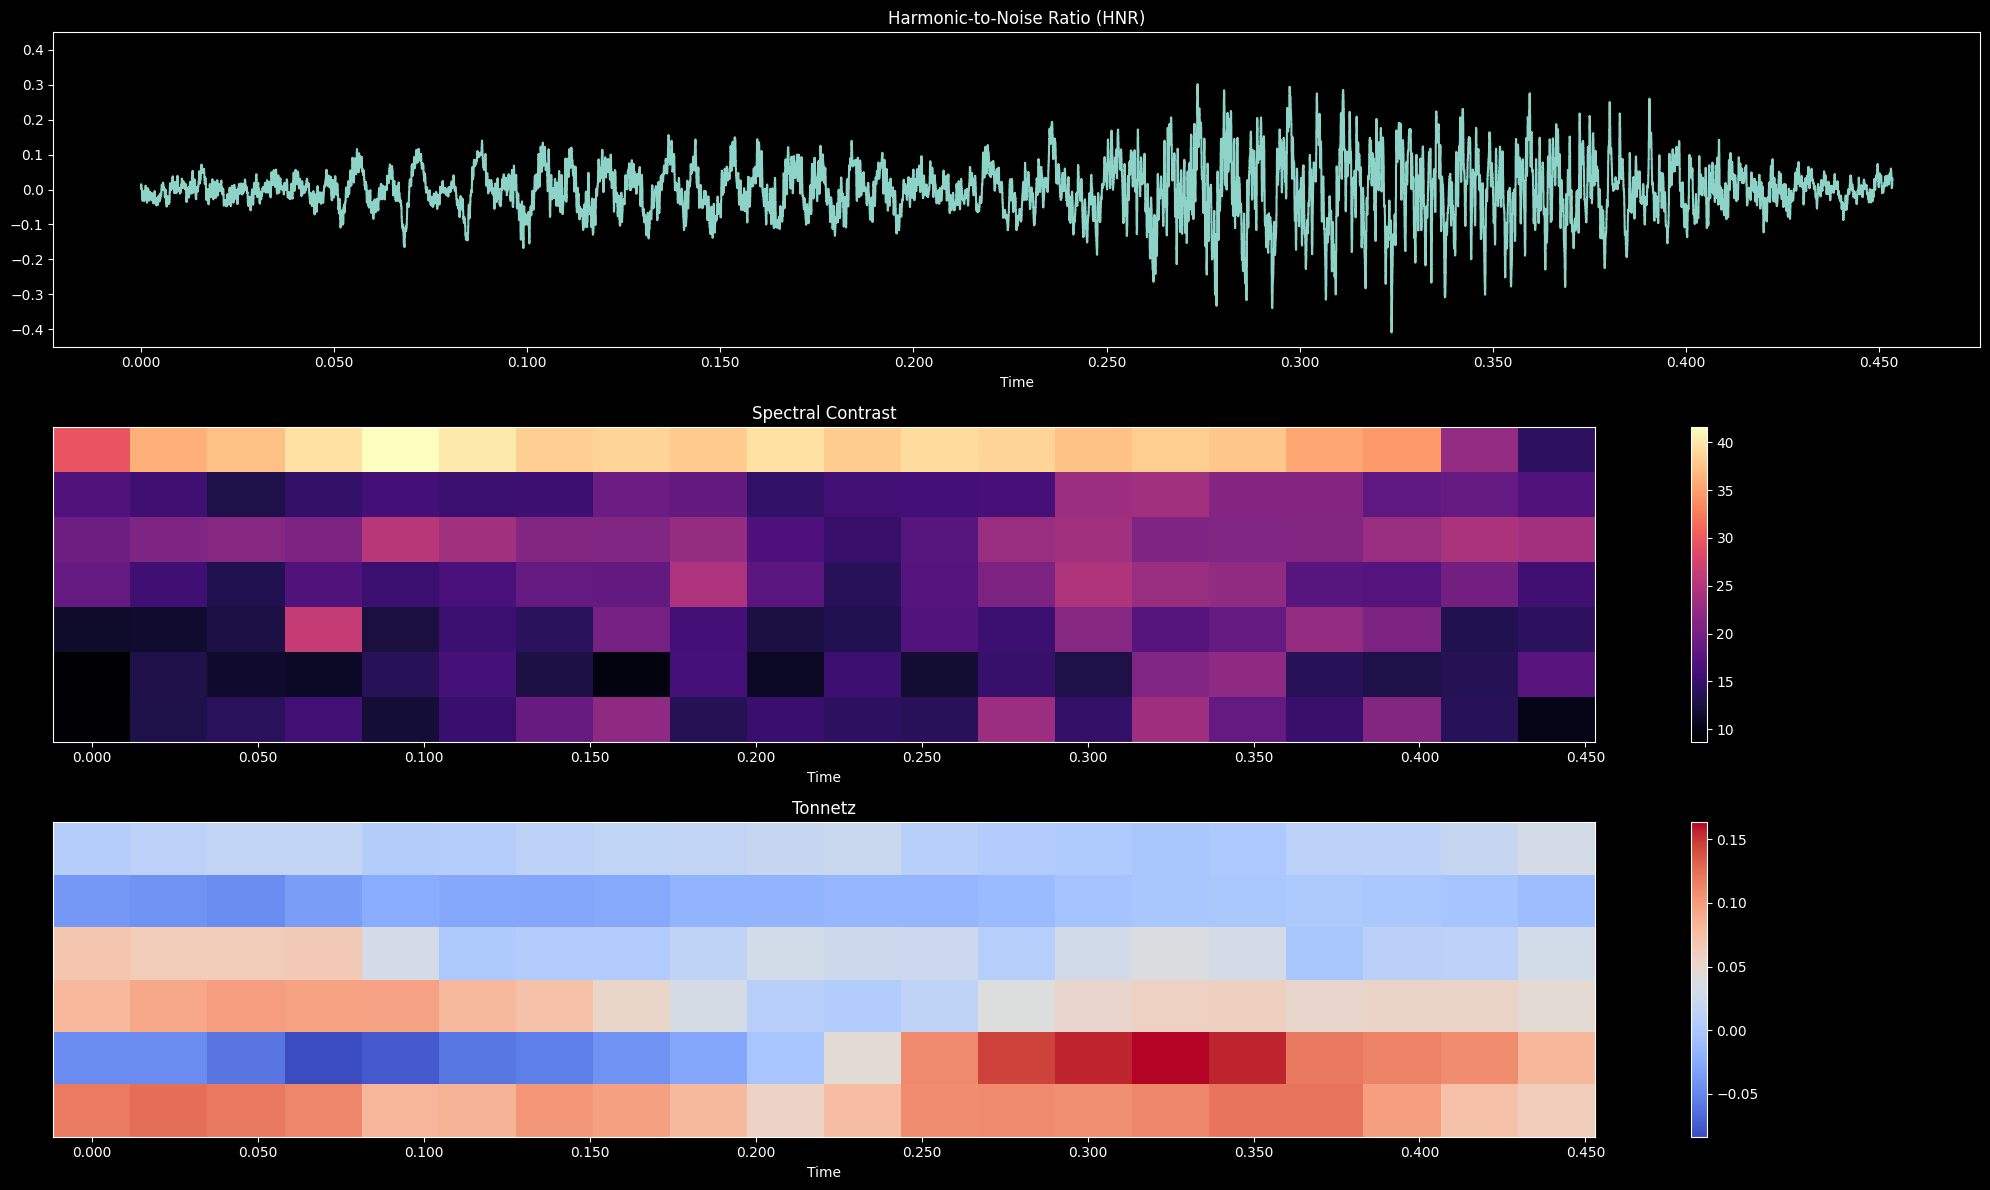

In [134]:
# Calculate the harmonic-to-noise ratio (HNR)
hnr = librosa.effects.harmonic(y)

# Calculate spectral contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# Calculate tonnetz (tonal centroid features)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

# Plot the harmonic-to-noise ratio (HNR)
plt.figure(figsize=(20, 12))
plt.subplot(3, 1, 1)
librosa.display.waveshow(hnr, sr=sr)
plt.title('Harmonic-to-Noise Ratio (HNR)')

# Plot the spectral contrast
plt.subplot(3, 1, 2)
librosa.display.specshow(spectral_contrast, x_axis='time', sr=sr)
plt.colorbar()
plt.title('Spectral Contrast')

# Plot the tonnetz
plt.subplot(3, 1, 3)
librosa.display.specshow(tonnetz, x_axis='time', sr=sr)
plt.colorbar()
plt.title('Tonnetz')

plt.tight_layout()
plt.show()

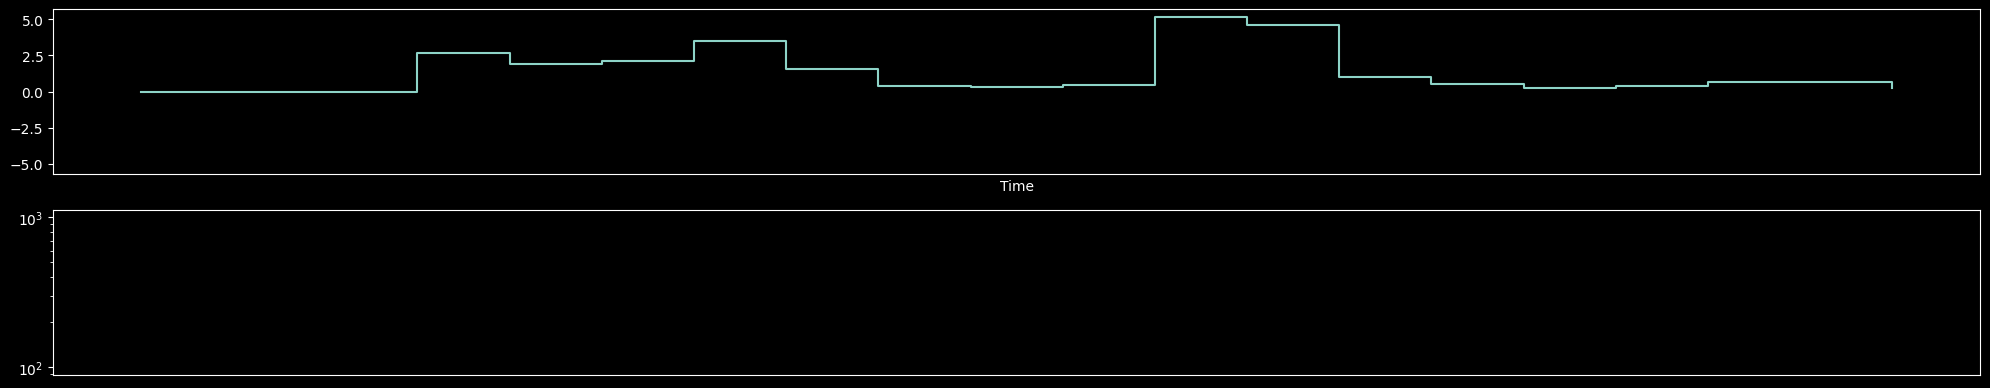

In [135]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr)

# Estimate the tempo
tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

# Plot the onset envelope
plt.figure(figsize=(20, 4))
plt.subplot(2, 1, 1)
librosa.display.waveshow(onset_env, sr=sr, axis='time', label='Onset Envelope')
plt.xticks([])

# Plot the estimated tempo
plt.subplot(2, 1, 2)
plt.semilogy(tempo, label='Estimated Tempo (BPM)', color='r')
plt.xticks([])

plt.tight_layout()
plt.show()

In [136]:
import math
from matplotlib import style

def cal_dft(sig_src_arr):
    sig_dest_imx_arr = [0.0] * int(len(sig_src_arr) / 2)
    sig_dest_rex_arr = [0.0] * int(len(sig_src_arr) / 2)
    
    for k in range(int(len(sig_src_arr) / 2)):
        for i in range(len(sig_src_arr)):
            sig_dest_rex_arr[k] += sig_src_arr[i] * math.cos(2 * math.pi * k * i / len(sig_src_arr))
            sig_dest_imx_arr[k] -= sig_src_arr[i] * math.sin(2 * math.pi * k * i / len(sig_src_arr))
    
    sig_dest_mag_arr = np.sqrt(np.power(sig_dest_rex_arr, 2) + np.power(sig_dest_imx_arr, 2))



    f, pltr_arr_1 = plt.subplots(4, sharex=True, figsize=(15, 15))
    f.suptitle("DFT")

    style.use('ggplot')
    style.use('dark_background')

    pltr_arr_1[0].plot(sig_src_arr, color='yellow', linewidth=1.0)
    pltr_arr_1[0].set_title('Input Signal', color='yellow')

    pltr_arr_1[1].plot(sig_dest_rex_arr, color='green', linewidth=1.0)
    pltr_arr_1[1].set_title('Frequency domain (real)', color='green')

    pltr_arr_1[2].plot(sig_dest_imx_arr, color='red', linewidth=1.0)
    pltr_arr_1[2].set_title('Frequency domain (imaginary)', color='red')

    pltr_arr_1[3].plot(sig_dest_mag_arr, color='blue', linewidth=1.0)
    pltr_arr_1[3].set_title('Frequency domain (magnitude)', color='blue')

    plt.show()

In [138]:
D = librosa.stft(y)

magnitude = np.abs(D)

frequencies = librosa.core.fft_frequencies(sr=sr)

sum_magnitudes = np.sum(magnitude, axis=1)

max_frequency = frequencies[np.argmax(sum_magnitudes)]

min_frequency = frequencies[np.argmin(sum_magnitudes)]

print(f"Maximum Frequency: {max_frequency} Hz")
print(f"Minimum Frequency: {min_frequency} Hz")

Maximum Frequency: 129.19921875 Hz
Minimum Frequency: 11025.0 Hz


In [139]:
sig_dest_rex_arr = []
sig_dest_imx_arr = []
sig_dest_mag_arr = []

def cal_dft(sig_src_arr):

    global sig_dest_imx_arr  
    global sig_dest_rex_arr
    global sig_dest_mag_arr
    
    sig_dest_imx_arr = [0.0] * int(len(sig_src_arr) / 2)
    sig_dest_rex_arr = [0.0] * int(len(sig_src_arr) / 2)
    sig_dest_mag_arr = [0.0] * int(len(sig_src_arr) / 2)


    for j in range(int(len(sig_src_arr)/2)):
        sig_dest_imx_arr[j] = 0
        sig_dest_imx_arr[j] = 0

    for k in range(int(len(sig_src_arr)/2)):
        for i in range(len(sig_src_arr)):
            sig_dest_rex_arr[k] = sig_dest_rex_arr[k] + sig_src_arr[i]*math.cos(2*math.pi*k*i/len(sig_src_arr))
            sig_dest_imx_arr[k] = sig_dest_imx_arr[k] + sig_src_arr[i]*math.sin(2*math.pi*k*i/len(sig_src_arr))
    
    for x in range(int(len(sig_src_arr)/2)):
        sig_dest_mag_arr[x] = math.sqrt(math.pow(sig_dest_rex_arr[x],2) + math.pow(sig_dest_imx_arr[x],2))


def plot_sigals(sig_src_arr):
    style.use('ggplot')
    style.use('dark_background')
    f , pltr_arr_1 = plt.subplots(5, sharex=True,figsize=(50, 25))
    f.suptitle("DFT")

    pltr_arr_1[0].plot(sig_src_arr, color='yellow',linewidth=1.0)
    pltr_arr_1[0].set_title('Input Signal', color='yellow',fontsize=50)

    pltr_arr_1[1].plot(sig_dest_rex_arr, color='green',linewidth=1.0)
    pltr_arr_1[1].set_title('Frequency domain (real)', color='green',fontsize=50)

    pltr_arr_1[2].plot(sig_dest_imx_arr, color='red',linewidth=1.0)
    pltr_arr_1[2].set_title('Frequency domain (imaginery)', color='red',fontsize=50)

    pltr_arr_1[3].plot(sig_dest_mag_arr, color='blue',linewidth=1.0)
    pltr_arr_1[3].set_title('Frequency domain (magnitude)', color='blue',fontsize=50)

    pltr_arr_1[4].plot(sig_dest_idft_arr, color='white',linewidth=1.0)
    pltr_arr_1[4].set_title('IDFT', color='white',fontsize=50)

    plt.show()



def cal_idft(sig_src_rex_arr,sig_src_imx_arr):
    
    global sig_dest_idft_arr  # globalize the variable
    sig_dest_idft_arr = [0.0] * int(len(sig_src_rex_arr) * 2)

    for j in range(len(sig_src_rex_arr)*2):
        sig_dest_idft_arr[j] = 0

    for x in range(len(sig_src_rex_arr)):
        sig_src_rex_arr[x] = sig_src_rex_arr[x]/len(sig_src_rex_arr)
        sig_src_imx_arr[x] = sig_src_imx_arr[x]/len(sig_src_rex_arr)

    for k in range(len(sig_src_rex_arr)):
        for i in range(len(sig_src_rex_arr)*2):
            sig_dest_idft_arr[i] = sig_dest_idft_arr[i] + sig_src_rex_arr[k]*math.cos(2*math.pi*k*i/(len(sig_src_rex_arr))*2)
            sig_dest_idft_arr[i] = sig_dest_idft_arr[i] + sig_src_imx_arr[k]*math.sin(2*math.pi*k*i/(len(sig_src_rex_arr))*2)


In [141]:
cal_dft(y)

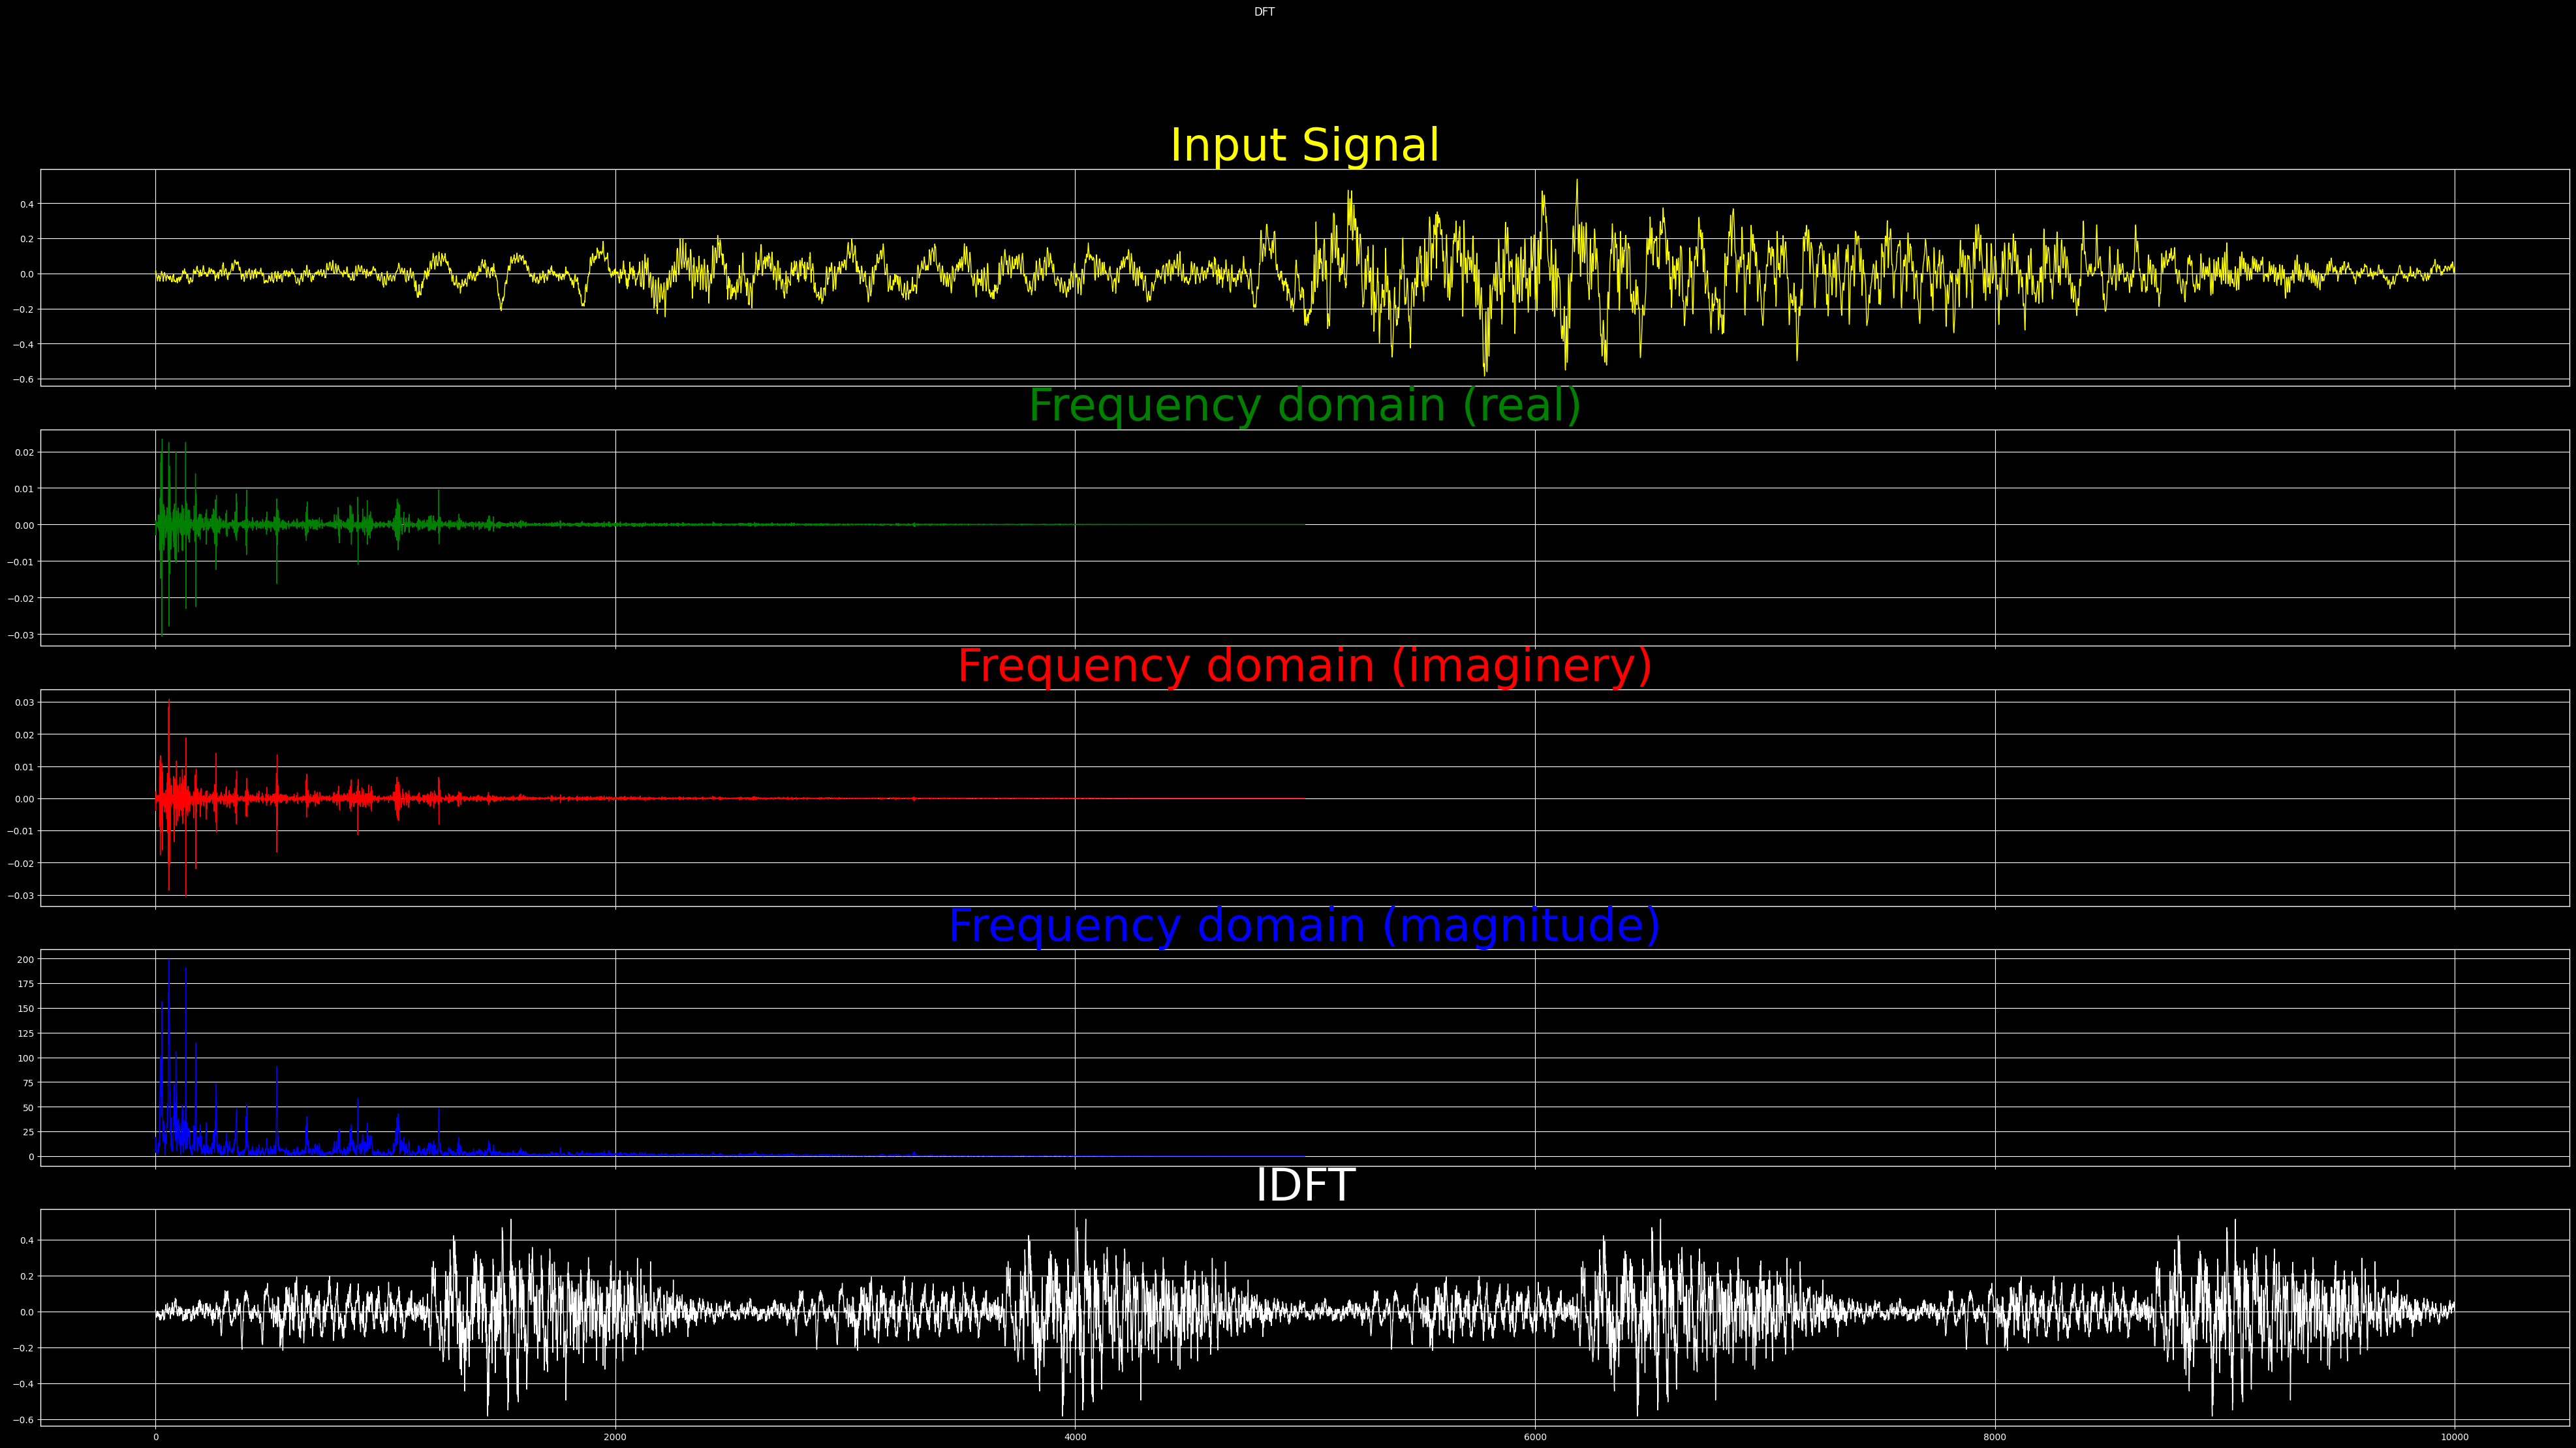

In [142]:
cal_idft(sig_dest_rex_arr,sig_dest_imx_arr)
plot_sigals(y)